<div class="alert alert-block alert-success">
<b>Loading necessary libraries and creating the data for analysis:</b> We will load the necessary libraries to develop our own implementation of DBSCAN and also create the necessary data for finding out clusters.
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs

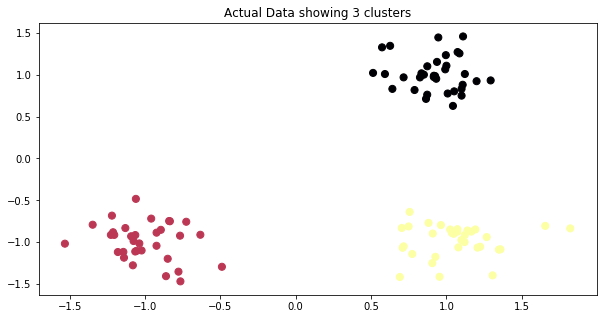

In [11]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, y = make_blobs(n_samples=100, centers=centers,random_state=2,cluster_std=0.2)
fig,ax = plt.subplots(figsize=(10,5))
ax.set_title("Actual Data showing 3 clusters")
ax.scatter(X[:,0],X[:,1],c=y,s=50,cmap = 'inferno');

<div class="alert alert-block alert-success">
<b>Creating our own function for DBSCAN:</b> The implementation of DBSCAN involves the updation required after finding necessary clusters of some point chosen. There are 2 parameters needed (eps and minpts), which will be declared and the cluster centroids will be updated till all samples have one cluster centroid
</div>

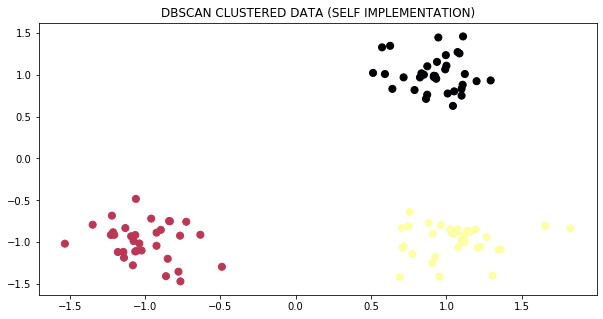

In [9]:
eps = 1
minpts = 3
D = X

def update_labels(X,pt,eps,labels,cluster_val):
    neighbors = []
    label_index = []
    for i in range(X.shape[0]):
        if np.linalg.norm(X[pt]-X[i])<eps:
            neighbors.append(X[i])
            label_index.append(i)
    if len(neighbors) <minpts:
        for i in range(len(labels)):
            if i in label_index:
                labels[i]=-1
    else:
        for i in range(len(labels)):
            if i in label_index:
                labels[i]=cluster_val
    return labels

labels = [0]*X.shape[0]
C = 1
for p in range(X.shape[0]):
    if labels[p]==0:
        labels = update_labels(X,p,eps,labels,C)
        C= C+1
        
fig,ax = plt.subplots(figsize=(10,5))
ax.set_title("DBSCAN CLUSTERED DATA (SELF IMPLEMENTATION)")
ax.scatter(X[:,0],X[:,1],c=labels,s=50,cmap = 'inferno');

<div class="alert alert-block alert-success">
<b>Implementation using sklearn's DBSCAN:</b> We use Sklearn's implementation of DBSCAN using certain parameters provided and we can clearly see that it is able to detect blobs in the same way as our implementation above. The only thing worth noting here is the fact that minimal parameter tuning was required, so its pretty much efficient.
</div>

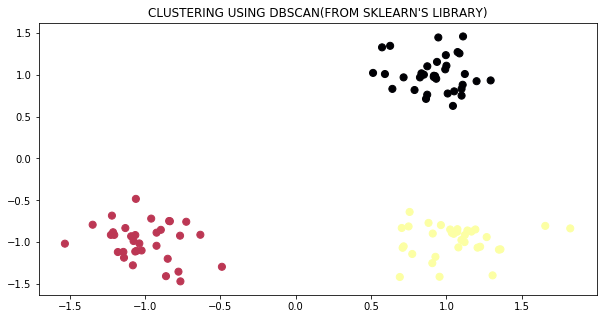

In [10]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 0.7).fit(X)
dbscanlabels = dbscan.labels_
fig,ax = plt.subplots(figsize=(10,5))
ax.set_title("CLUSTERING USING DBSCAN(FROM SKLEARN'S LIBRARY)")
ax.scatter(X[:,0],X[:,1],c=dbscanlabels,s=50,cmap = 'inferno');